# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"



In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']


In [6]:

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57166.80
The current value of your 5.3 ETH is $8220.46


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [10]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp('2021-02-12', tz='America/New_York').isoformat()


In [11]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"



In [12]:
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
closing_df = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
    ).df
# Preview DataFrame
# YOUR CODE HERE!
closing_df.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765  389.85   

                                                            
                            high     low   close    volume  
2021-02-12 00:00:00-05:00  392.9  389.77  392.69  39697380

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = closing_df['AGG']['close'].item()
spy_close_price = closing_df['SPY']['close'].item()
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.58
Current SPY closing price: $392.69


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19634.50
The current value of your 200 AGG shares is $23316.00


### Savings Health Analysis

In [15]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
total_savings_dictionary = {'Amount':[my_btc_value + my_eth_value, my_spy_value + my_agg_value]}
df_savings = pd.DataFrame(total_savings_dictionary, index = ['crypto', 'shares'] )

# Display savings DataFrame
display(df_savings)

,Amount
crypto,65387.259
shares,42950.500


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000205C0E7ECA0>],
      dtype=object)

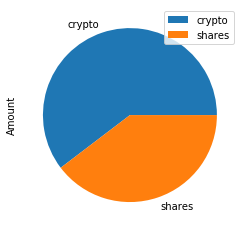

In [16]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind = 'pie', subplots = True)

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = my_btc_value + my_eth_value +my_spy_value + my_agg_value
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("congratulating the person for having enough money in this fund")
elif total_savings == emergency_fund:
    print("congratulating the person on reaching this financial goal.")
else:
    print("how many dollars away the person is from reaching the goal")

congratulating the person for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
## My initial solution for Alpaca's 1000 limit.
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-02-12', tz='America/New_York').isoformat()
middle_date = pd.Timestamp('2018-08-12', tz='America/New_York').isoformat()
day_afer_middle = pd.Timestamp('2018-08-13', tz= 'America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-12', tz='America/New_York').isoformat()

In [19]:
## My initial solution for Alpaca's 1000 limit.
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
first_half = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = middle_date,
    limit = 1000
).df
second_half = api.get_barset(
    tickers,
    timeframe,
    start = day_afer_middle,
    end = end_date,
    limit = 1000
).df
df_stock_data = pd.concat([first_half, second_half], join = "inner")
# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
2016-02-12 00:00:00-05:00  109.92  109.9600  109.5450  109.76  2640547.0   
2016-02-16 00:00:00-05:00  109.54  109.6100  109.4301  109.51  2145056.0   
2016-02-17 00:00:00-05:00  109.43  109.4599  109.2200  109.43  2271584.0   
2016-02-18 00:00:00-05:00  109.50  109.8100  109.4500  109.75  2595248.0   
2016-02-19 00:00:00-05:00  109.80  109.8500  109.6400  109.78  2124710.0   

                              SPY                                     
                             open    high     low   close     volume  
2016-02-12 00:00:00-05:00  184.98  186.65  183.96  186.64  102758219  
2016-02-16 00:00:00-05:00  188.77  189.78  187.63  189.77   89705367  
2016-02-17 00:00:00-05:00  191.16  193.32  191.01  192.87  107535734  
2016-02-18 00:00:00-05:00  193.20  193.27  191.72  192.04   86202947  
2016-02-19 00:00:00-05:00  191.17  192.18  190.45  192.02   79539603

In [ ]:
## Leo's solution for Alpaca's 1000 limits.
import numpy as np
import datetime as dt

#Set start and end datetimes of 5 years from Today
date_list = [["2016-02-12"],["2021-02-12"]]

# Find the total number of business days
limit = np.busday_count(date_list[0][0], date_list[1][0])

# Logic for data that is greater than Alpca's 1000 limit but below 2000 rows (5 year limit)
if limit > 1000: 
    newend = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1000)),"%Y-%m-%d")
    date_list[0].insert(1, newend)
    newstart = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1001)),"%Y-%m-%d")
    date_list[1].insert(0, newstart)
    ticker_data = []
    # Get AGG and SPY historical data for data greater than 1000 rows
    for i in range(2):
        data = api.get_barset(
        tickers,
        timeframe,
        start = pd.Timestamp(date_list[i][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[i][1], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
        ticker_data.append(data)
    all_ticker_data = pd.concat(ticker_data, axis="rows", join="inner")
else:
    # Get AGG and SPY historical data for data less than 1000 rows
    all_ticker_data = api.get_barset(
        tickers,
        timeframe,
        start = pd.Timestamp(date_list[0][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[1][0], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
    
all_ticker_data

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 500
MC_STOCK_30Y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_STOCK_30Y.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2016-02-12 00:00:00-05:00  109.92  109.9600  109.5450  109.76  2640547   
2016-02-16 00:00:00-05:00  109.54  109.6100  109.4301  109.51  2145056   
2016-02-17 00:00:00-05:00  109.43  109.4599  109.2200  109.43  2271584   
2016-02-18 00:00:00-05:00  109.50  109.8100  109.4500  109.75  2595248   
2016-02-19 00:00:00-05:00  109.80  109.8500  109.6400  109.78  2124710   

                                           SPY                          \
                          daily_return    open    high     low   close   
2016-02-12 00:00:00-05:00          NaN  184.98  186.65  183.96  186.64   
2016-02-16 00:00:00-05:00    -0.002278  188.77  189.78  187.63  189.77   
2016-02-17 00:00:00-05:00    -0.000731  191.16  193.32  191.01  192.87   
2016-02-18 00:00:00-05:00     0.002924  193.20  193.27  191.72  192.04   
2016-02-19 00:00:00-05:00     0.000273  191.17  192.18  190.45  192.02   

                                                   
                              volume daily_return  
2016-02-12 00:00:00-05:00  102758219          NaN  
2016-02-16 00:00:00-05:00   89705367     0.016770  
2016-02-17 00:00:00-05:00  107535734     0.016336  
2016-02-18 00:00:00-05:00   86202947    -0.004303  
2016-02-19 00:00:00-05:00   79539603    -0.000104

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_STOCK_30Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981559,0.999297,1.015388,1.005076,1.001598,1.002936,0.991544,0.990504,1.002869,1.002691,...,1.011201,1.000891,1.021239,0.996283,1.009574,1.002787,1.007277,1.002940,0.995046,1.008148
2,0.981467,0.997480,1.010402,1.005317,1.003120,1.000899,0.980983,0.991842,1.001237,1.001655,...,1.001446,1.007227,1.018605,0.982802,1.013351,1.003007,1.015193,0.994063,1.001371,1.001063
3,0.978246,0.995935,1.010543,1.018396,0.995389,1.012687,0.979533,0.985922,0.988516,1.008270,...,1.008323,0.996279,1.013223,0.986301,1.021544,1.001454,1.002078,0.990153,0.999465,1.003720
4,0.973827,0.995516,1.015492,1.017246,1.003553,1.018587,0.984641,0.980125,0.979989,1.012248,...,1.005039,1.011227,1.013867,0.996601,1.029707,1.004615,1.004164,0.997888,1.012841,1.003858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,18.850802,24.780030,17.912970,4.897740,42.484910,16.828245,23.042707,31.374693,13.731726,11.395805,...,25.739003,25.129550,17.766330,23.006082,13.595023,18.035444,33.230366,18.266433,18.278009,39.608875
7557,18.849329,24.750402,17.815958,4.916215,43.015074,16.780472,23.063190,31.584039,13.688725,11.420547,...,25.937382,24.890883,17.854274,22.896876,13.522795,17.887114,33.264704,18.644047,18.250071,39.147867
7558,18.683458,24.807103,18.114901,4.931675,43.192532,16.870279,23.042362,31.470765,13.564400,11.463085,...,25.965488,24.680223,18.144396,23.175954,13.696548,18.044254,33.476816,18.515137,18.213845,38.968106
7559,18.844545,24.546098,17.814904,4.921895,42.848806,16.908972,23.055373,31.216486,13.572446,11.604136,...,25.687458,24.625595,18.464432,23.232508,13.689944,17.969082,33.471955,18.511282,18.103291,39.068300


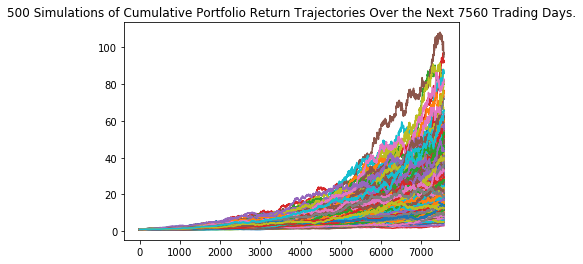

In [64]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_STOCK_30Y.plot_simulation()

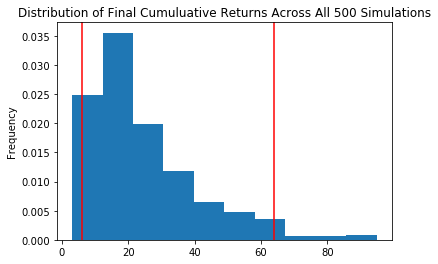

In [56]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot = MC_STOCK_30Y.plot_distribution()

### Retirement Analysis

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_30Y = MC_STOCK_30Y.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl_30Y

count           500.000000
mean             24.642365
std              16.329046
min               3.092583
25%              13.000584
50%              19.903501
75%              31.921508
max              94.830011
95% CI Lower      6.056280
95% CI Upper     63.956915
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [60]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl_30Y[8]* initial_investment,2)
ci_upper = round(tbl_30Y[9]* initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $121125.59 and $1279138.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [61]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl_30Y[8]* initial_investment,2)
ci_upper = round(tbl_30Y[9]* initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $181688.39 and $1918707.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [62]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
num_sims = 500
MC_STOCK_5Y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [63]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_STOCK_5Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996580,0.998529,1.002415,0.996785,0.992661,0.997652,1.004815,1.005371,1.006159,1.008092,...,1.013006,0.993416,1.002776,1.001135,0.993809,0.994928,0.985471,1.004129,1.006883,1.005176
2,0.998104,0.992960,1.008874,0.991808,0.995599,0.992396,0.999435,1.012425,0.998987,1.012627,...,1.022147,1.006789,0.998199,0.991488,0.997090,0.991112,0.985248,0.996887,1.007740,1.010627
3,1.008042,0.988440,1.006530,1.000277,0.987550,0.984648,0.995498,1.016918,1.006975,1.010209,...,1.014399,1.018258,0.995216,0.987416,1.007470,1.003803,0.994938,0.993822,0.996645,1.001425
4,1.010022,0.979554,0.995506,1.008964,1.000211,0.981719,0.999051,1.020774,1.008858,1.001343,...,1.030907,1.017483,0.990201,0.985339,1.006015,1.012460,0.992107,0.987470,1.003588,0.996519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.407916,1.574475,1.914550,1.505467,2.416808,1.690184,1.825047,2.614007,1.761984,1.155358,...,1.736910,2.536950,1.191618,1.411933,2.495181,1.496477,2.563227,2.990493,1.510338,1.998005
1257,1.400425,1.589385,1.919815,1.508219,2.454795,1.683739,1.827352,2.627616,1.779709,1.156995,...,1.731716,2.554539,1.185517,1.415553,2.515460,1.485092,2.558898,3.003094,1.495801,2.007275
1258,1.378415,1.597997,1.917447,1.508625,2.455124,1.693897,1.824573,2.610964,1.760120,1.153748,...,1.737030,2.565195,1.192844,1.415303,2.504578,1.495148,2.572697,2.961193,1.490651,2.002612
1259,1.397486,1.608968,1.888091,1.516126,2.440630,1.709010,1.811948,2.603794,1.771473,1.144248,...,1.733577,2.571346,1.219718,1.417301,2.502638,1.493581,2.565549,2.965456,1.504487,1.987356


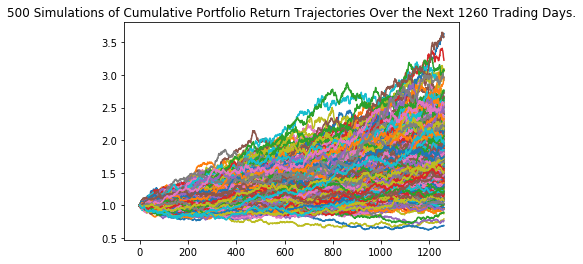

In [66]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5Y = MC_STOCK_5Y.plot_simulation()

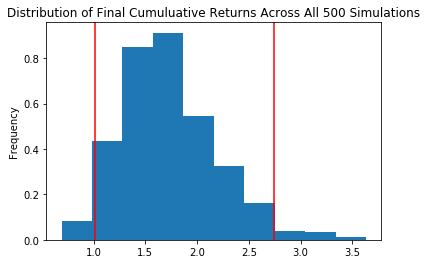

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
distribution_plot_5Y = MC_STOCK_5Y.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5Y = MC_STOCK_5Y.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl_5Y

count           500.000000
mean              1.735026
std               0.459126
min               0.690997
25%               1.391042
50%               1.692249
75%               2.020250
max               3.630695
95% CI Lower      1.016600
95% CI Upper      2.742677
Name: 1260, dtype: float64

In [71]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_5y = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_5Y[8]* initial_investment,2)
ci_upper_five = round(tbl_5Y[9]* initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $30498.01 and $82280.32


### Ten Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
num_sims = 500
MC_STOCK_10Y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = num_sims,
    num_trading_days = 252* 10
)

In [76]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_STOCK_10Y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995681,1.006153,0.992245,0.987147,1.004164,0.995872,1.000879,0.997409,1.011525,0.999587,...,1.004137,1.004487,1.001688,1.008244,1.002630,0.991418,1.003632,1.005144,1.020258,1.003835
2,0.993941,0.992795,0.998063,0.990840,1.001027,0.988462,1.001229,0.985848,1.001014,1.000331,...,0.992933,0.999938,1.003129,0.993172,1.002281,0.983142,1.000581,1.003890,1.015518,1.013321
3,1.000532,0.998320,0.993564,0.988587,0.998925,0.989694,1.000395,0.990894,1.000981,0.998112,...,0.982162,1.004569,1.011073,0.982497,0.994645,0.978868,0.995392,1.001803,1.017879,1.024753
4,0.998574,0.990461,0.997461,0.998386,1.001779,0.993048,1.003874,0.996634,1.002413,0.989360,...,0.985349,1.014824,1.021055,0.979387,1.000861,0.977321,0.987420,0.998898,1.011255,1.027231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.441206,2.908371,1.913391,2.210536,3.575825,1.431069,2.875621,3.133584,2.517519,2.026345,...,2.434336,2.533809,2.781959,3.321043,5.332634,1.135837,2.865448,5.678406,4.982273,3.132801
2517,1.425065,2.896285,1.917758,2.209951,3.583687,1.441256,2.832446,3.118573,2.505306,2.043261,...,2.442922,2.509184,2.806026,3.320864,5.375276,1.150410,2.849269,5.705750,4.971464,3.148395
2518,1.439354,2.882200,1.915279,2.222445,3.612965,1.449452,2.801852,3.131491,2.493298,2.019783,...,2.424364,2.511979,2.826174,3.334294,5.312756,1.154134,2.840111,5.692041,5.106481,3.136539
2519,1.451916,2.925110,1.906424,2.235663,3.605069,1.447257,2.788978,3.151106,2.481270,2.063870,...,2.441108,2.515592,2.820347,3.310233,5.344086,1.153597,2.828624,5.700507,5.100889,3.128546


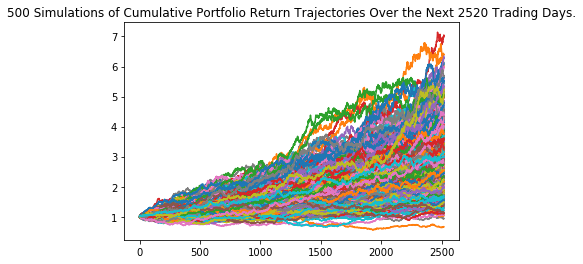

In [77]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10Y = MC_STOCK_10Y.plot_simulation()

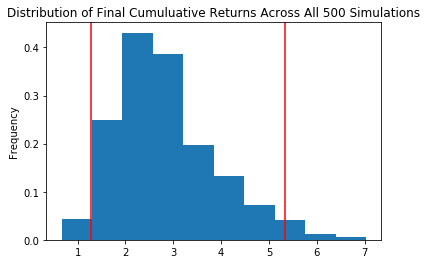

In [78]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_STOCK_10Y.plot_distribution()

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10Y = MC_STOCK_10Y.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl_10Y

count           500.000000
mean              2.847739
std               1.050830
min               0.664659
25%               2.109939
50%               2.685133
75%               3.412159
max               7.026446
95% CI Lower      1.288627
95% CI Upper      5.330848
Name: 2520, dtype: float64

In [81]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_10Y = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_10Y[8]* initial_investment_10Y, 2)
ci_upper_ten = round(tbl_10Y[9]* initial_investment_10Y, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $25772.54 and $106616.95
